In [ ]:
 import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_diabetes
from sklearn import datasets
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split, KFold
import math

In [ ]:
diabetes = load_diabetes()

bmi = diabetes.data[:, 2]
target = diabetes.target
print(bmi[:10])

[ 0.06169621 -0.05147406  0.04445121 -0.01159501 -0.03638469 -0.04069594
 -0.04716281 -0.00189471  0.06169621  0.03906215]


# Functions
- Linear line
- Back propagation
- Scatter plotting
- Sum of Squared Error (SSE)
- Mean of Squared Error (MSE)
- r2_score

In [ ]:
def myline(x, a = 1.0, b = 1.0):
  return a*x + b

def back_prop(x, y, a = 1.0, b = 1.0):
  y_hat = a*x + b
  err = y - y_hat
  a += x*err
  b += err
  return a, b

def scat_plot(x, y, a, b):
  xs = np.linspace(-0.1, 0.17, 10)

  _, axe = plt.subplots()
  sns.scatterplot(x, y, ax = axe)
  axe.plot(xs, myline(xs, a, b))

def SSE(tgt, model):
  return ((tgt - model)**2).sum()   # (y - y_hat)**2, chain rule, differentiation = (y - y_hat)*x

def MSE(tgt, model):
  return ((tgt - model)**2).mean()

def r2(tgt, model):
  return 1 - SSE(tgt, model)/SSE(tgt, tgt.mean())

"""
r2_score:
SSE(tgt, tgt.mean()) -> target의 평균값을 가진 수평선을 model로 하여 SSE계산
~ 1의 값을 가지며 1에 가까울수록 적합하다.
만약, 음수의 값이 나온다면, target의 평균값을 가진 수평선보다 model이 부정확하다는 의미로 매우 부정확함을 의미한다.
"""

'\nr2_score:\nSSE(tgt, tgt.mean()) -> target의 평균값을 가진 수평선을 model로 하여 SSE계산\n~ 1의 값을 가지며 1에 가까울수록 적합하다.\n만약, 음수의 값이 나온다면, target의 평균값을 가진 수평선보다 model이 부정확하다는 의미로 매우 부정확함을 의미한다.\n'

# Epoch = 1

587.8654539985689 99.40935564531424
SSE:  3079001.0434122942
R2_score:  -0.17473877321077214


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


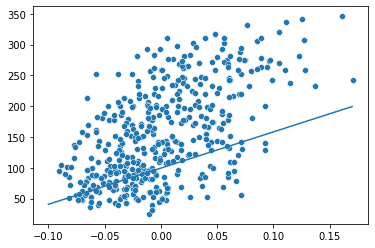

In [ ]:
# 1. Epoch = 1
a = 1.0
b = 1.0

list_a = []
list_sse = []
for bmi_i, target_i in zip(bmi, target):
  a, b = back_prop(bmi_i, target_i, a, b)
  list_a.append(a)
  list_sse.append(SSE(target, myline(bmi, a, b)))

a1, b1 = a, b
print(a1, b1)
print('SSE: ', SSE(target, myline(bmi, a1, b1)))
print('R2_score: ', r2(target, myline(bmi, a1, b1)))
scat_plot(bmi, target, a1, b1)

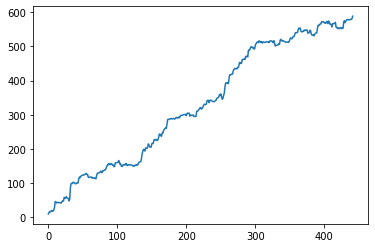

In [ ]:
_, axe = plt.subplots()
axe.plot(list_a)

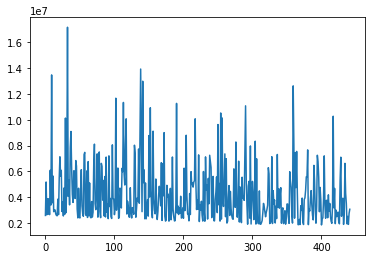

In [ ]:
_, axe = plt.subplots()
axe.plot(list_sse)

# Epoch = 20

913.5973353302317 123.3941437504542
SSE:  2085935.929451312
R2_score:  0.20414778033195347


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


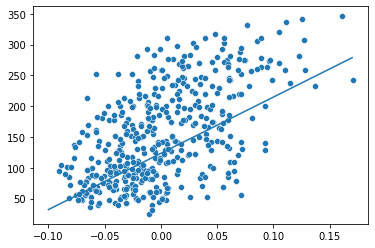

In [ ]:
# 2. Epoch = 20
a = 1.0
b = 1.0

list_a = []
list_sse = []
for i in range(20):
  for bmi_i, target_i in zip(bmi, target):
    a, b = back_prop(bmi_i, target_i, a, b)
  list_a.append(a)
  list_sse.append(SSE(target, myline(bmi, a, b)))
a2, b2 = a, b

print(a2, b2)
print('SSE: ', SSE(target, myline(bmi, a2, b2)))
print('R2_score: ', r2(target, myline(bmi, a2, b2)))
scat_plot(bmi, target, a2, b2)

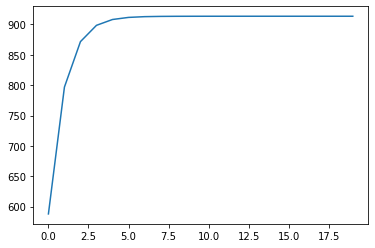

In [ ]:
_, axe = plt.subplots()
axe.plot(list_a)

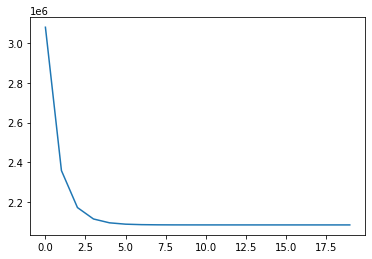

In [ ]:
_, axe = plt.subplots()
axe.plot(list_sse)

# Gradient Decent
- Gradient decent
- Stochastic gradient decent
- Batch gradient decent

# Multiple variables

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_diabetes
from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
import math

In [ ]:
diabetes = load_diabetes()
X = diabetes.data[:, 2:4]
target = diabetes.target
print(X[:10])

[[ 0.06169621  0.02187235]
 [-0.05147406 -0.02632783]
 [ 0.04445121 -0.00567061]
 [-0.01159501 -0.03665645]
 [-0.03638469  0.02187235]
 [-0.04069594 -0.01944209]
 [-0.04716281 -0.01599922]
 [-0.00189471  0.06662967]
 [ 0.06169621 -0.04009932]
 [ 0.03906215 -0.03321358]]


In [ ]:
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

# BMI, Blood Presure으로 weight prediction

In [ ]:
reg = LinearRegression()
reg.fit(X, target)

# Same
print(reg.score(X, target))
print(r2_score(target, reg.predict(X)))

0.39599414313715675
0.39599414313715675


In [ ]:
X_train, X_test, target_train, target_test = train_test_split(X, target)

reg = LinearRegression().fit(X_train, target_train)
a, b = reg.coef_, reg.intercept_
print(a, b)
print(reg.score(X_train, target_train)) # Train set으로 r2_score 측정
print(reg.score(X_test, target_test))   # Test set으로 r2_score 측정

[815.11916117 432.307713  ] 149.8410745055332
0.4012601893933193
0.3597367728844568


# predict
- $\hat{y}(w, x) = w_0 + w_1 x_1 + ... + w_p x_p$
- $w$: weight (coef_)
- $w_{0}$: intercept

In [ ]:
def myline(x, a = 1.0, b = 1.0):  # 1 variable
  return a*x + b

def mypredict(X, a, b):           # Multi variables
  return np.dot(X, a) + b

"""
y_hat = a_1 * x_1 + a_2 * x_2 + b
X와 a의 각 곱에 대한 합 + y_intercept -> dot product
x_1: bmi_i
x_2: bp_i
a_1: reg.coef_[0]
a_2: reg.coef_[1]
"""

'\ny_hat = a_1 * x_1 + a_2 * x_2 + b\nX와 a의 각 곱에 대한 합 + y_intercept -> dot product\nx_1: bmi_i\nx_2: bp_i\na_1: reg.coef_[0]\na_2: reg.coef_[1]\n'

# Sklearn의 내장 함수인 predict와 직접 만든 mypredict(dot product)가 같음  
  따라서, sklearn의 predict도 multiple variables일 때, dot product으로 계산했음을 알 수 있다.


In [ ]:
sk_predict = reg.predict(X_test)
my_predict = mypredict(X_test, a, b)

print(sk_predict[:10])
print(my_predict[:10])

[120.75999924 138.8168526  159.02339389  65.94906899 295.34273589
 175.66428    215.8295898  112.75014359 130.34140633  92.64655049]
[120.75999924 138.8168526  159.02339389  65.94906899 295.34273589
 175.66428    215.8295898  112.75014359 130.34140633  92.64655049]


# Limitation of Regression
- Input set: Independent variables
- Output set: Target (dependent)
- 각 independent variables와 target사이에는 상관관계가 있을 것으로 예상된다.
- 하지만, independent variables사이에는 상관관계가 존재하면 안된다.
- 각 independent variables가 target과 상관관계가 존재한다면 variables사이에도 상관관계가 존재할 수 밖에 없다.
- 따라서, 많은 independent variables으로 regression을 할 경우, train set에서의 정확도는 증가하지만, test set에서의 정확도는 감소한다.

**$\rightarrow$ Over-fitting**을 유발한다.

# Overcome over-fitting
- **Ridge coefficients** as a function of the regularization
- Ridge를 사용한 regularization으로 weight의 변동성을 감소시킨다.  
- https://scikit-learn.org/stable/auto_examples/linear_model/plot_ridge_path.html  

  **$\rightarrow$ Over-fitting 방지**

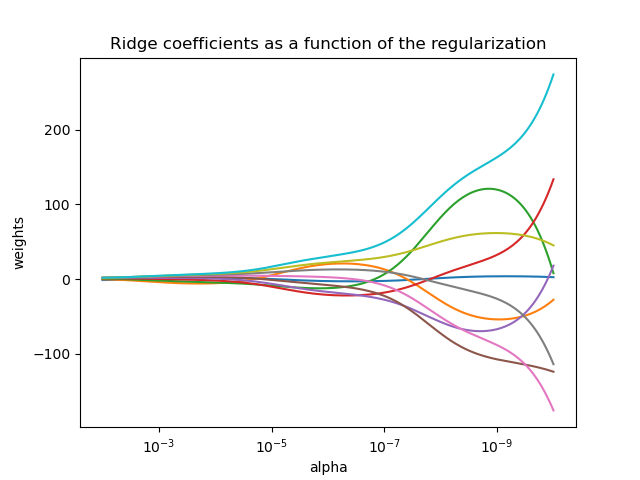


# Linear Regression
- SSE사용
- $\min_{w} || X w - y||_2^2$

# Ridge, Lasso
- 0 <= alpha < 1
- 값이 커질수록 과적합 방지

- **Ridge**  
  $\min_{w} || X w - y||_2^2 + \alpha ||w||_2^2$


- **Lasso**  
  $\min_{w} { \frac{1}{2n_{\text{samples}}} ||X w - y||_2 ^ 2 + \alpha ||w||_1}$


In [ ]:
X_train, X_test, target_train, target_test = train_test_split(X, target, shuffle = False)

# reg = LinearRegression()
#reg = Ridge(alpha = 0.5)
reg = Lasso(alpha = 0.3)
reg.fit(X_train, target_train)

print(reg.coef_, reg.intercept_)

print('Train score: ', reg.score(X_train, target_train)) # Train set으로 r2_score 측정
print('Test score: ', reg.score(X_test, target_test))   # Test set으로 r2_score 측정

[685.70382556 298.29144552] 151.44972649652271
Train score:  0.3640931090901155
Test score:  0.44054694462535327


# Application
- **Dataset**: linnerud
- **Independent Variables**: Chins, Situps, Jumps
- **Target**: Weight
- **LinearRegressino, Ridge, Lasso** 사용  

1) 각각 전체 데이터 사용 train, test
- r2_score 계산

2) Train, test를 3:1로 나눠서 사용
- r2_score 계산

In [ ]:
linn = datasets.load_linnerud()

X = linn.data
target = linn.target[:,0]

print(linn.DESCR)

.. _linnerrud_dataset:

Linnerrud dataset
-----------------

**Data Set Characteristics:**

    :Number of Instances: 20
    :Number of Attributes: 3
    :Missing Attribute Values: None

The Linnerud dataset is a multi-output regression dataset. It consists of three
exercise (data) and three physiological (target) variables collected from
twenty middle-aged men in a fitness club:

- *physiological* - CSV containing 20 observations on 3 physiological variables:
   Weight, Waist and Pulse.
- *exercise* - CSV containing 20 observations on 3 exercise variables:
   Chins, Situps and Jumps.

.. topic:: References

  * Tenenhaus, M. (1998). La regression PLS: theorie et pratique. Paris:
    Editions Technic.



# 전체 데이터 사용
- alpha = 0.9

In [ ]:
reg1_lin = LinearRegression().fit(X, target)
reg1_rid = Ridge(alpha = 0.5).fit(X, target)
reg1_lasso = Lasso(alpha = 0.5).fit(X, target)

print('Linear Regression score: ', reg1_lin.score(X, target))
print('Ridge score: ', reg1_rid.score(X, target))
print('Lasso score: ', reg1_lasso.score(X, target))

Linear Regression score:  0.26791906955299694
Ridge score:  0.267919052591283
Lasso score:  0.2678896914736336


# 결과
- Linear regression, Ridge, Lasso 모두 r2_score는 0.268정도로 나왔다.
- Linear regression, Ridge, Lasso 사이에는 정확도의 차이가 크게 관찰되지 않는다.

# 데이터 분할 사용
- alpha = 0.9

In [ ]:
X_train, X_test, target_train, target_test = train_test_split(X, target, shuffle = False)

reg2_lin = LinearRegression().fit(X_train, target_train)
reg2_rid = Ridge(alpha = 0.9).fit(X_train, target_train)
reg2_lasso = Lasso(alpha = 0.9).fit(X_train, target_train)

print('Training Set')
print('Linear Regression score: ', reg2_lin.score(X_train, target_train))
print('Ridge score: ', reg2_rid.score(X_train, target_train))
print('Lasso score: ', reg2_lasso.score(X_train, target_train))

print('-'*40)
print('Testing Set')
print('Linear Regression score: ', reg2_lin.score(X_test, target_test))
print('Ridge score: ', reg2_rid.score(X_test, target_test))
print('Lasso score: ', reg2_lasso.score(X_test, target_test))

Training Set
Linear Regression score:  0.559711455053554
Ridge score:  0.5597103510291295
Lasso score:  0.5596210693437227
----------------------------------------
Testing Set
Linear Regression score:  -1.5907752982561782
Ridge score:  -1.5889851741899825
Lasso score:  -1.5739062145842948


# 결과
**Train set**
- Linear regression, Ridge, Lasso 모두 train set에서 r2_score는 0.560정도로 나왔다.
- Linear regression, Ridge, Lasso 사이에는 적합도의 차이가 크게 관찰되지 않는다.

**Test set**
- Test set에서는 Linear regression, Ridge, Lasso의 r2_score가 각각 -1.591, -1.589, -1.574으로 나왔다.
- 미세하게 Lasso > Ridge > Linear regression 순으로 score가 측정되었다.

**Total**
- Train set에 비하여 test set으로 prediction 적합성을 확인했을 때, 확연히 낮게 측정되었다.
- 즉, Overfitting되었음을 알 수 있다.


# Cross Validation
- 한정된 dataset내에서 Training set과 testing set을 다양하게 사용하기 위한 방법
- Data의 수가 적을 때, 많이 사용한다.
- https://scikit-learn.org/stable/modules/cross_validation.html#cross-validation-and-model-selection

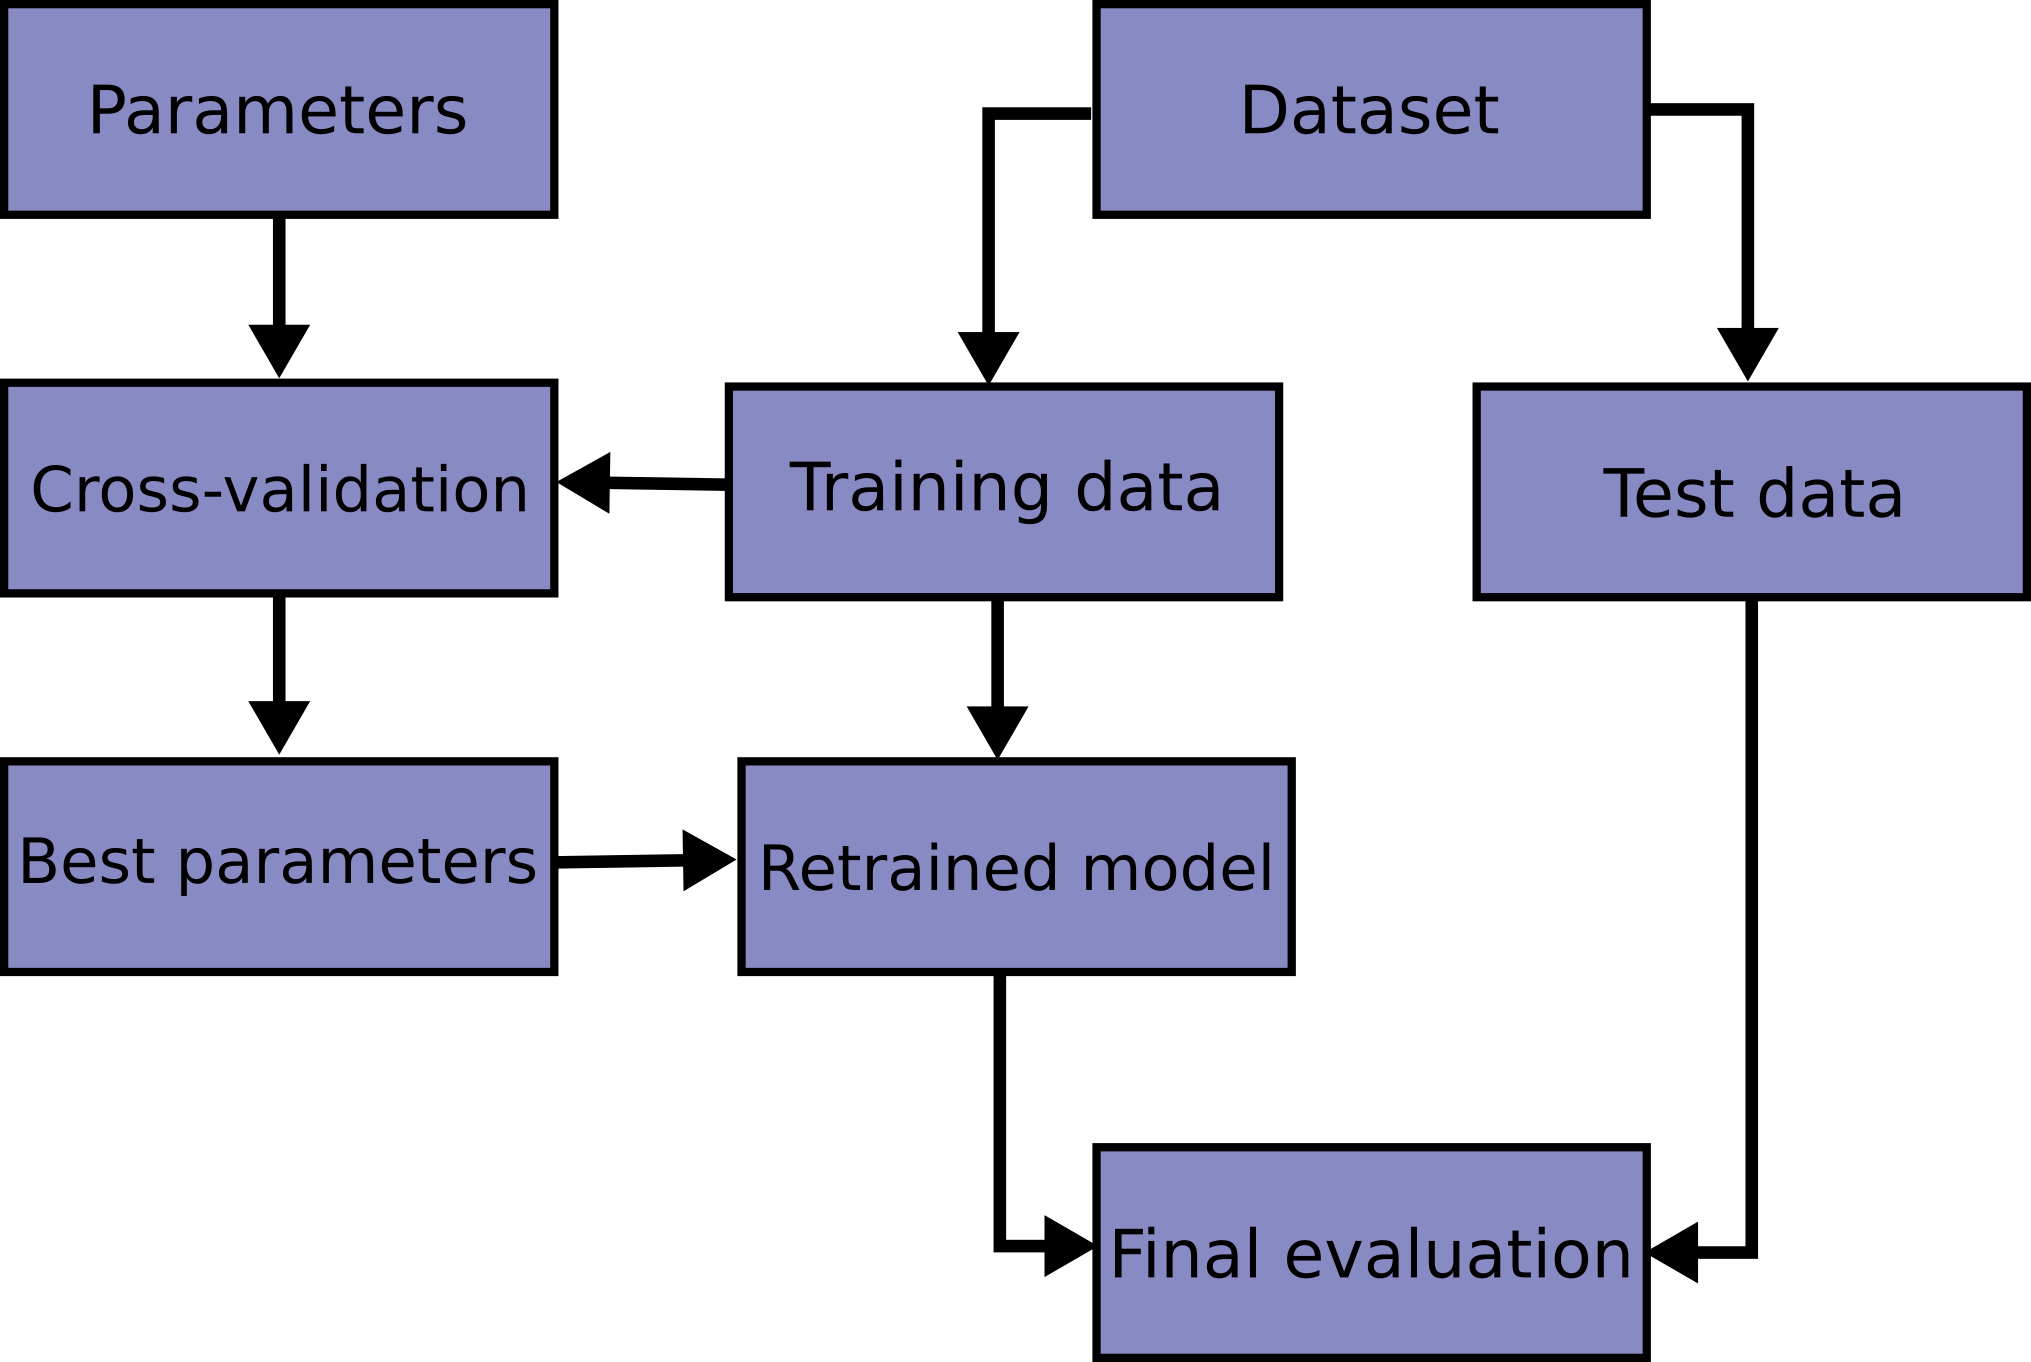

# K-fold Cross Validation
- k개만큼 분해한 dataset을 training, testing에 사용함으로써 overfitting을 방지하는데 사용한다.
- https://scikit-learn.org/stable/modules/cross_validation.html#cross-validation-and-model-selection

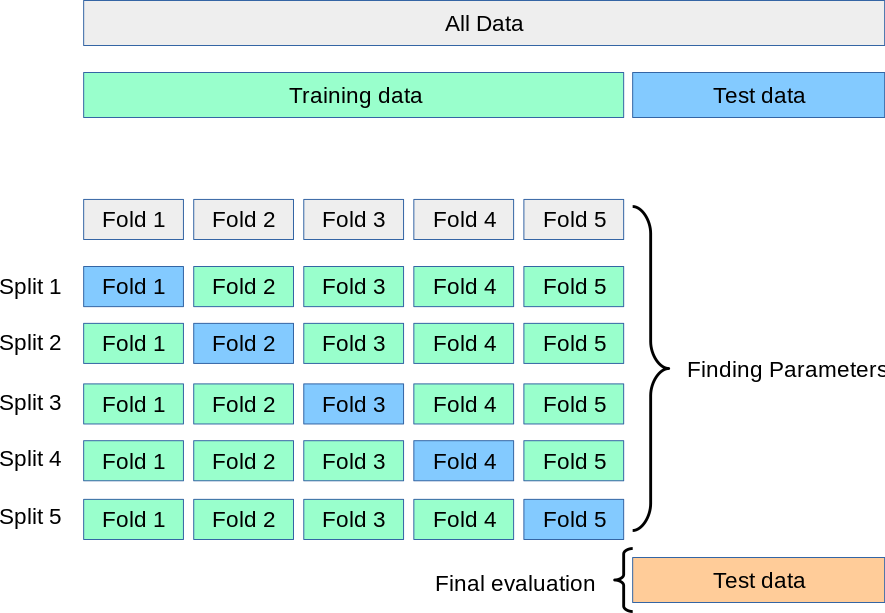

# KFold()
- n_fold: 분해할 토막의 수(k)  
  (default: 5)
- shuffle은 default False


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, target, shuffle = False)
kf = KFold(n_splits = 3)
reg = LinearRegression()

coef = []
intercept = []

for train_index, validate_index in kf.split(X_train):
  xt = X_train[train_index]
  xv = X_train[validate_index]
  yt = y_train[train_index]
  yv = y_train[validate_index]
  reg.fit(xt, yt)
  coef.append(reg.coef_)
  intercept.append(reg.intercept_)

  print('Score: ', reg.score(xv, yv))
  print(reg.coef_, reg.intercept_)
  print('-'*60)

coef_mean = np.array(coef).mean(axis = 0)
intercept_mean = np.array(intercept).mean()

print('Average of coefficients: ', coef_mean, '\nAverage of intercept: ', intercept_mean)

Score:  -0.7502124589133361
[-1.28927543 -0.30015632  0.0845437 ] 231.90191554408636
------------------------------------------------------------
Score:  -0.45845534428221657
[-2.37569794 -0.28955958  0.23418402] 230.1149102929828
------------------------------------------------------------
Score:  0.4318927414158785
[-0.44285531 -0.1017747  -0.04579565] 203.24801411602968
------------------------------------------------------------
Average of coefficients:  [-1.36927623 -0.23049686  0.09097736] 
Average of intercept:  221.75494665103295


In [ ]:
def mypredict(X, a, b):
  return np.dot(X, a) + b

reg_control = LinearRegression().fit(X_train, y_train)
print('Control: ', reg_control.score(X_test, y_test))

predict = mypredict(X_test, coef_mean, intercept_mean)
print('K-fold: ', r2_score(y_test, predict))

Control:  -1.5907752982561782
K-fold:  -1.3537824529679434


# 결과
- K-fold에서 k를 3으로 했을 때, k-fold를 하지 않았을 때보다 testing set에 대한 r2_score이 더 높게 나왔다.
- 따라서, k-fold cross validation이 overfitting을 방지하는데 어느정도 기여를 하는 것을 알 수 있다.

# Application 2
- https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_california_housing.html#sklearn.datasets.fetch_california_housing
- Regression Model 만들기
  - Independent variables: MedInc, HouseAge
  - Target: AveRooms
- Train test split 사용
- **목표: r2_score 최댓값 얻기!**

In [ ]:
ca_housing = datasets.fetch_california_housing(as_frame = True)
#X, y = datasets.fetch_california_housing(as_frame = True, return_X_y = True)
print(ca_housing.data)

# as_frame: pandas dataframe으로 만들어준다.
# return_X_y: X, y를 return 한다.

       MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0      8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1      8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2      7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3      5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4      3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
...       ...       ...       ...        ...         ...       ...       ...   
20635  1.5603      25.0  5.045455   1.133333       845.0  2.560606     39.48   
20636  2.5568      18.0  6.114035   1.315789       356.0  3.122807     39.49   
20637  1.7000      17.0  5.205543   1.120092      1007.0  2.325635     39.43   
20638  1.8672      18.0  5.329513   1.171920       741.0  2.123209     39.43   
20639  2.3886      16.0  5.254717   1.162264      1387.0  2.616981     39.37   

       Longitude  
0        -122.23  
1

# Plotting

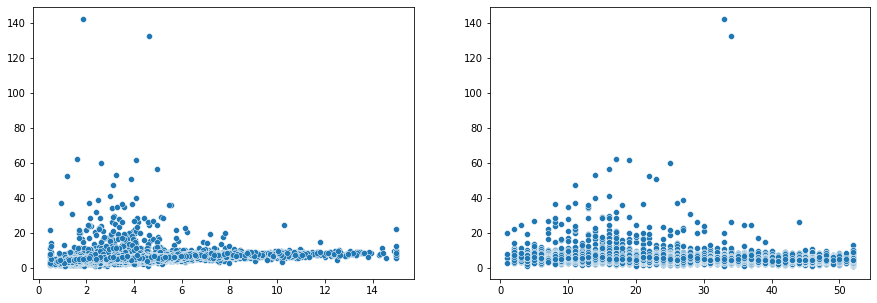

In [ ]:
fig, axes = plt.subplots(1, 2, figsize = (15, 5))
sns.scatterplot(x = ca_housing.data[:,0], y = ca_housing.data[:,2], ax = axes[0])
sns.scatterplot(x = ca_housing.data[:,1], y = ca_housing.data[:,2], ax = axes[1])

# Pandas DataFrame으로 변경

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  
0    -122.23  
1    -122.22  
2    -122.24  
3    -122.25  
4    -122.25  


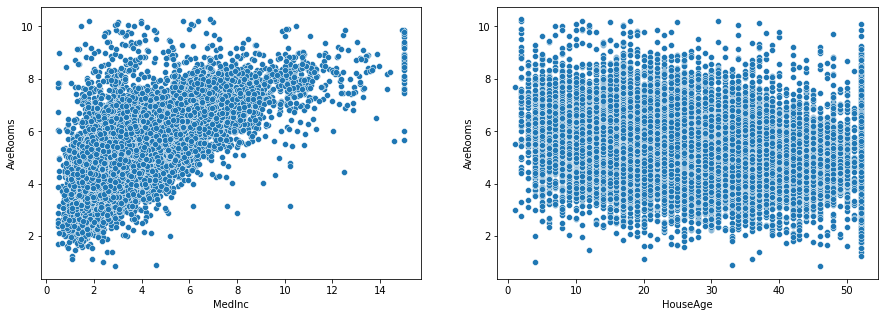

In [ ]:
pd_data = pd.DataFrame(ca_housing.data, columns = ca_housing.feature_names)
print(pd_data.head(5))

"""
Outlier 제거
95% confidence intervals
mean - 1.96std <    < mean + 1.96std
"""
Mean = pd_data['AveRooms'].mean()
Std = pd_data['AveRooms'].std()
filter1 = pd_data['AveRooms'] > (Mean - 1.96 * Std)
filter2 = pd_data['AveRooms'] < (Mean + 1.96 * Std)
pd_data = pd_data[filter1 & filter2]

fig, axes = plt.subplots(1, 2, figsize = (15, 5))
sns.scatterplot(data = pd_data, x = 'MedInc', y = 'AveRooms', ax = axes[0])
sns.scatterplot(data = pd_data, x = 'HouseAge', y = 'AveRooms', ax = axes[1])

In [ ]:
# X = ca_housing.data[:,:2]   # MedInc, HouseAge
# y = ca_housing.data[:,2]    # AveRooms

# Outlier를 제거해야 score가 증가한다.
X = pd_data[['MedInc', 'HouseAge']].values    # MedInc, HouseAge
y = pd_data['AveRooms'].values                # AveRooms

kf = KFold()

X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle = False)

r1 = LinearRegression().fit(X_train, y_train)
r2 = Ridge(alpha = 0.5).fit(X_train, y_train)
r3 = Lasso(alpha = 0.3).fit(X_train, y_train)

print('Linear Regression')
print('train: ', r1.score(X_train, y_train))
print('test: ', r1.score(X_test, y_test))

print('\nRidge')
print('train: ', r2.score(X_train, y_train))
print('test: ', r2.score(X_test, y_test))

print('\nLasso')
print('train: ', r3.score(X_train, y_train))
print('test: ', r3.score(X_test, y_test))

Linear Regression
train:  0.4853294675020232
test:  0.40746756742991364

Ridge
train:  0.4853294674634565
test:  0.407468825953454

Lasso
train:  0.46897328282220685
test:  0.41360152221914304


In [ ]:
print(r1.coef_, r1.intercept_)
# y_hat = 0.4427*MedInc - 0.0131*HouseAge + 3.9279

[ 0.4426896  -0.01312999] 3.9279078341604814


# K-Fold 사용

In [ ]:
coef = []
intercept = []

for train_index, validate_index in kf.split(X_train):
  xt = X_train[train_index]
  xv = X_train[validate_index]
  yt = y_train[train_index]
  yv = y_train[validate_index]
  r3.fit(xt, yt)
  coef.append(r3.coef_)
  intercept.append(r3.intercept_)

coef_mean = np.array(coef).mean(axis = 0)
intercept_mean = np.array(intercept).mean()
predict = mypredict(X_train, coef_mean, intercept_mean)
print(r2_score(y_train, predict))

0.4690072821372717
